In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import scipy.special as special
import scipy.integrate as integrate
import matplotlib.pyplot as plt
# fake beta function
def special_beta(alpha, beta): return special.gamma(alpha)*special.gamma(beta)/special.gamma(alpha+beta)

In [2]:
import eko.dglap as dglap
import eko.interpolation as interpolation
%aimport eko.dglap
%aimport eko.interpolation

In [3]:
def plot_dist(x,y,yref):
    """compare to distributions both in linear and logarithmic x-space"""
    plt.figure(figsize=(10,7))
    plt.subplot(2,2,1)
    plt.title("f(x) vs ref(x)")
    plt.plot(x,y,"o")
    plt.plot(x,yref,"x")
    plt.subplot(2,2,3)
    plt.title("relative error")
    plt.semilogy(x,np.abs((y - yref)/yref))
    plt.subplot(2,2,2)
    plt.title("f(x) vs ref(x)")
    plt.semilogx(x,y,"o")
    plt.semilogx(x,yref,"x")
    plt.subplot(2,2,4)
    plt.title("relative error")
    plt.loglog(x,np.abs((y - yref)/yref))

In [10]:
toy_xgrid = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,.1,.3,.5,.7,.9]
def toy_uv0(x):
    return 5.107200 * x**(0.8-1.0) * (1. - x)**3

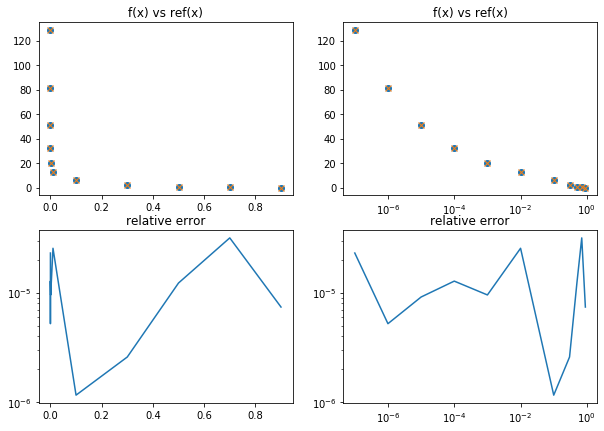

In [11]:
toy_uv0_grid = np.array([toy_uv0(x) for x in toy_xgrid])
toy_uv0_grid_ref = np.array([1.2829e-5,8.0943e-5,5.1070e-4,3.2215e-3,2.0271e-2,1.2448e-1,5.9008e-1,6.6861e-1,3.6666e-1,1.0366e-1,4.6944e-3])
plot_dist(toy_xgrid,toy_uv0_grid,toy_uv0_grid_ref/toy_xgrid)

In [8]:
interpolation.get_xgrid_Chebyshev_at_log10(7,1e-6)

[1.189094207336904e-06,
 4.513417958554193e-06,
 4.992853033786162e-05,
 0.000999999999999999,
 0.020028628786649537,
 0.2215615768765043,
 0.8409762606106714]

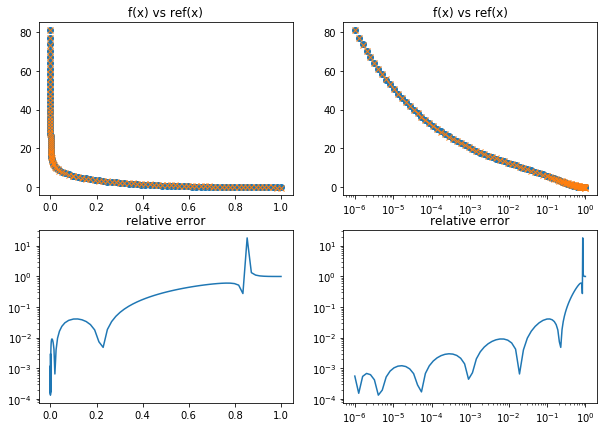

In [20]:
# [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1.0])
def plot_interpolation(f,g):
    """plot f(x) and its interpolation obtained by n grid points"""
    n = len(g)
    fs = [f(x) for x in g]
    p = lambda xx: np.sum([fs[j] * interpolation.get_Lagrange_iterpolators_log_x(xx,g,j) for j in range(n)])
    xs = np.append(np.logspace(-6.,-1.),np.linspace(.1,1.))
    ys = np.array([f(x) for x in xs])
    yps = np.array([p(x) for x in xs])
    plot_dist(xs,ys,yps)
plot_interpolation(toy_uv0,interpolation.get_xgrid_Chebyshev_at_log10(7,1e-6))

In [21]:
ret = dglap.run_dglap({
    "PTO": 0,
    'alphas': 0.35,
    'Qref': np.sqrt(2),
    'Q0': np.sqrt(2),
    'NfFF': 4,

    "xgrid_size": 7,
    "targetgrid": toy_xgrid,
    "Q2grid": [1e4]
})

In [22]:
ret

{'xgrid': [1.223917958912311e-07,
  5.802161478317237e-07,
  9.580913364872306e-06,
  0.0003162277660168376,
  0.010437418249354227,
  0.17234956381979627,
  0.8170482283703839],
 'operators': {'NS': array([[ 8.91773836e-01,  1.42347467e+00,  2.42375307e+00,
           4.52681714e+00,  5.99730408e+00,  6.00438085e+00,
           2.12159406e+00],
         [-1.01014871e-01,  8.08071569e-01,  2.26112426e+00,
           3.16695163e+00,  4.64371760e+00,  4.58645406e+00,
           1.66920976e+00],
         [ 3.49404025e-02, -1.47970081e-01,  1.39963708e+00,
           2.70840997e+00,  3.27560452e+00,  3.58317798e+00,
           1.25436423e+00],
         [ 5.67286927e-04, -6.96923184e-03,  7.29641398e-02,
           2.19362214e+00,  2.48039064e+00,  2.64120938e+00,
           9.60995994e-01],
         [-2.83540884e-02,  9.54054031e-02, -2.16684063e-01,
           8.32486201e-01,  2.26064965e+00,  1.82278632e+00,
           7.46369671e-01],
         [ 1.32959530e-02, -4.31739599e-02,  8.69787

In [23]:
toy_uv1_xgrid = np.array([toy_uv0(x) for x in ret["xgrid"]])
toy_uv1_grid = np.dot(ret["operators"]["NS"],toy_uv1_xgrid)
toy_uv1_grid_ref = np.array([5.7722e-5,3.3373e-4,1.8724e-3,1.0057e-2,5.0392e-2,2.1955e-1,5.7267e-1,3.7925e-1,1.3476e-1,2.3123e-2,4.3443e-4])

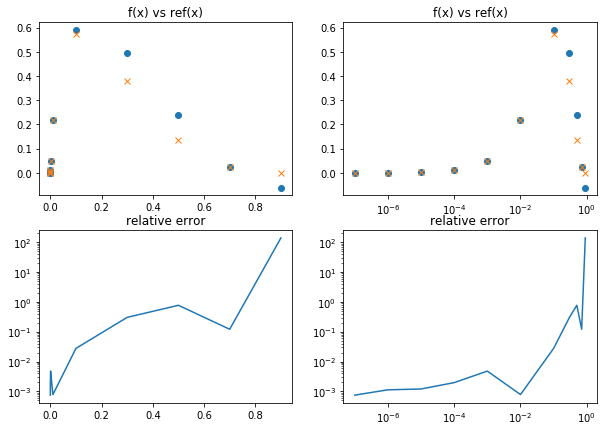

In [25]:
plot_dist(toy_xgrid,toy_xgrid*toy_uv1_grid,toy_uv1_grid_ref)